In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Devices.csv')
df.head(20)

,Unnamed: 0,Heart,Calories,Steps,Distance,Age,Gender,Weight,Height,Activity,Device
0,0,55,2.70432,8.0,0.003666,35,M,179.0,5.6,1.Sedentary,Fitbit
1,1,54,2.92968,13.0,0.006027,35,M,179.0,5.6,1.Sedentary,Fitbit
2,2,59,2.70432,9.0,0.004163,35,M,179.0,5.6,1.Sedentary,Fitbit
3,3,58,2.70432,11.0,0.005095,35,M,179.0,5.6,1.Sedentary,Fitbit
4,4,58,1.12680,0.0,0.000000,35,M,179.0,5.6,1.Sedentary,Fitbit
5,5,60,1.23948,0.0,0.000000,35,M,179.0,5.6,1.Sedentary,Fitbit
6,6,62,2.25360,40.0,0.018517,35,M,179.0,5.6,1.Sedentary,Fitbit
7,7,65,3.15504,37.0,0.017150,35,M,179.0,5.6,1.Sedentary,Fitbit
8,8,71,3.15504,80.0,0.037096,35,M,179.0,5.6,1.Sedentary,Fitbit
9,9,81,6.76080,114.0,0.052879,35,M,179.0,5.6,1.Sedentary,Fitbit


In [2]:
df['Activity'].value_counts()

Activity
1.Sedentary    45717
0.Sleep        28488
2.Light         2676
3.Moderate      1525
4.Vigorous       180
Name: count, dtype: int64

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics



In [4]:
binary = df
binary['sleep'] = np.where((binary['Activity'] == '0.Sleep'), 'Sleep', 'Awake')
binary['sleep'].value_counts()

sleep
Awake    50098
Sleep    28488
Name: count, dtype: int64

In [5]:
binary[binary['sleep'] == 'Sleep']

,Unnamed: 0,Heart,Calories,Steps,Distance,Age,Gender,Weight,Height,Activity,Device,sleep
127,127,85,3.605760,10.0,0.004598,35,M,179.0,5.6,0.Sleep,Fitbit,Sleep
128,128,67,1.126800,0.0,0.000000,35,M,179.0,5.6,0.Sleep,Fitbit,Sleep
129,129,58,1.126800,0.0,0.000000,35,M,179.0,5.6,0.Sleep,Fitbit,Sleep
130,130,58,1.126800,0.0,0.000000,35,M,179.0,5.6,0.Sleep,Fitbit,Sleep
131,131,58,1.126800,0.0,0.000000,35,M,179.0,5.6,0.Sleep,Fitbit,Sleep
...,...,...,...,...,...,...,...,...,...,...,...,...
78552,78552,75,0.421040,8.0,6.902514,25,M,189.5,5.5,0.Sleep,Apple Watch,Sleep
78553,78553,76,0.721732,2.0,1.852324,25,M,189.5,5.5,0.Sleep,Apple Watch,Sleep
78554,78554,76,0.209887,2.0,1.852324,25,M,189.5,5.5,0.Sleep,Apple Watch,Sleep
78555,78555,77,0.099254,2.0,1.852324,25,M,189.5,5.5,0.Sleep,Apple Watch,Sleep


In [6]:
binary_copy = binary.copy()

In [7]:
one_hot = pd.get_dummies(binary_copy['sleep'], dtype='int')
# Drop column B as it is now encoded
binary_copy = binary_copy.drop('sleep',axis = 1)
# Join the encoded df
binary_copy = binary_copy.join(one_hot)


In [8]:
one_hot = pd.get_dummies(binary_copy['Gender'], dtype='int')
# Drop column B as it is now encoded
binary_copy = binary_copy.drop('Gender',axis = 1)
# Join the encoded df
binary_copy = binary_copy.join(one_hot)


In [9]:
one_hot = pd.get_dummies(binary_copy['Device'], dtype='int')
# Drop column B as it is now encoded
binary_copy = binary_copy.drop('Device',axis = 1)
# Join the encoded df
binary_copy = binary_copy.join(one_hot)
binary_copy.head()

,Unnamed: 0,Heart,Calories,Steps,Distance,Age,Weight,Height,Activity,Awake,Sleep,F,M,Apple Watch,Fitbit
0,0,55,2.70432,8.0,0.003666,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1
1,1,54,2.92968,13.0,0.006027,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1
2,2,59,2.70432,9.0,0.004163,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1
3,3,58,2.70432,11.0,0.005095,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1
4,4,58,1.12680,0.0,0.000000,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1


In [10]:
binary['Age'].value_counts()

Age
31    11406
22    10841
36     9310
23     7221
24     7068
40     6212
41     5610
26     4340
35     4055
44     3560
21     3364
38     1896
33     1769
34     1471
42      360
25      103
Name: count, dtype: int64

In [11]:
def cat1(value):
    if value > 40:
        return "40+"
    elif value > 30:
        return "30-40"
    else:
        return "20-30"
binary_copy['age group'] = binary_copy.apply(lambda row: cat1(row['Age']), axis = 1)

In [12]:
binary_copy.head()

,Unnamed: 0,Heart,Calories,Steps,Distance,Age,Weight,Height,Activity,Awake,Sleep,F,M,Apple Watch,Fitbit,age group
0,0,55,2.70432,8.0,0.003666,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1,30-40
1,1,54,2.92968,13.0,0.006027,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1,30-40
2,2,59,2.70432,9.0,0.004163,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1,30-40
3,3,58,2.70432,11.0,0.005095,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1,30-40
4,4,58,1.12680,0.0,0.000000,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1,30-40


In [13]:
binary_copy['age group'].value_counts()

age group
30-40    36119
20-30    32937
40+       9530
Name: count, dtype: int64

In [14]:
twenties = binary_copy[binary_copy['age group'] == '20-30']
thirties = binary_copy[binary_copy['age group'] == '30-40']
forties = binary_copy[binary_copy['age group'] == '40+']

twenties_sampled = twenties.sample(n=10000, random_state=2024)
thirties_sampled = thirties.sample(n=10000, random_state=2024)
agesconcat = pd.concat([twenties_sampled, thirties_sampled, forties])

In [15]:
X = agesconcat[['Heart', 'Calories','Steps', 'Distance', 'Awake', 'Sleep', 'F', 'M', 'Apple Watch', 'Fitbit']]
y = agesconcat['age group']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 2024)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

              precision    recall  f1-score   support

       20-30       0.76      0.68      0.72      2012
       30-40       0.49      0.46      0.47      1971
         40+       0.60      0.69      0.64      1923

    accuracy                           0.61      5906
   macro avg       0.61      0.61      0.61      5906
weighted avg       0.62      0.61      0.61      5906



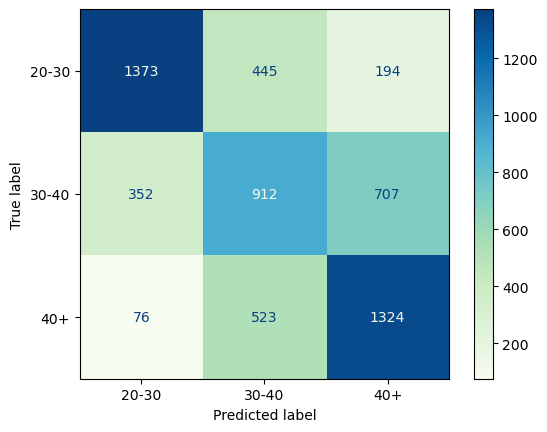

In [18]:
clf = linear_model.LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=clf.classes_)
print(metrics.classification_report(y_test, y_pred))
disp.plot(cmap="GnBu")

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_score = clf.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(3):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

              precision    recall  f1-score   support

       20-30       0.79      0.76      0.77      2012
       30-40       0.64      0.58      0.61      1971
         40+       0.68      0.78      0.73      1923

    accuracy                           0.71      5906
   macro avg       0.70      0.71      0.70      5906
weighted avg       0.71      0.71      0.70      5906



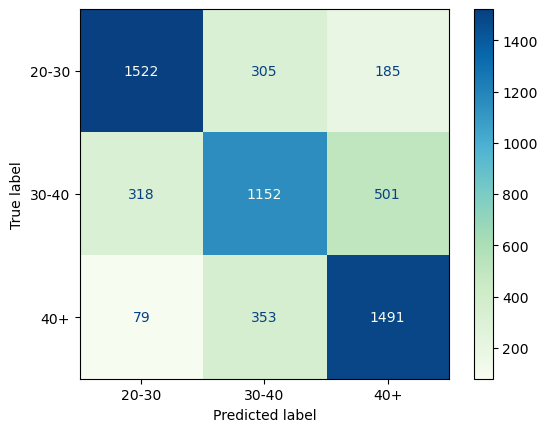

In [29]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)
 

y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=clf.classes_)
print(metrics.classification_report(y_test, y_pred))
disp.plot(cmap="GnBu")

              precision    recall  f1-score   support

       20-30       0.76      0.68      0.72      2012
       30-40       0.49      0.49      0.49      1971
         40+       0.60      0.68      0.64      1923

    accuracy                           0.61      5906
   macro avg       0.62      0.61      0.61      5906
weighted avg       0.62      0.61      0.62      5906



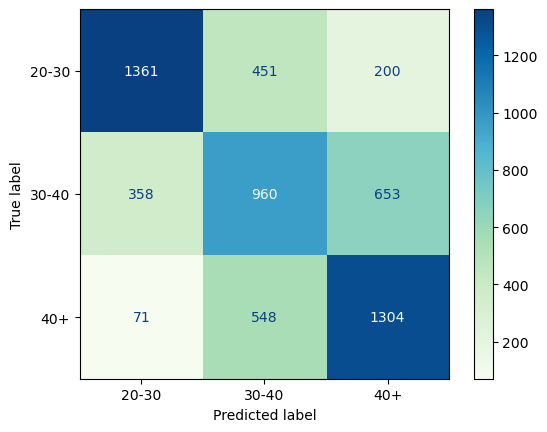

In [30]:

from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=clf.classes_)
print(metrics.classification_report(y_test, y_pred))
disp.plot(cmap="GnBu")

              precision    recall  f1-score   support

       20-30       0.76      0.68      0.72      2012
       30-40       0.49      0.49      0.49      1971
         40+       0.60      0.68      0.64      1923

    accuracy                           0.61      5906
   macro avg       0.62      0.61      0.61      5906
weighted avg       0.62      0.61      0.62      5906



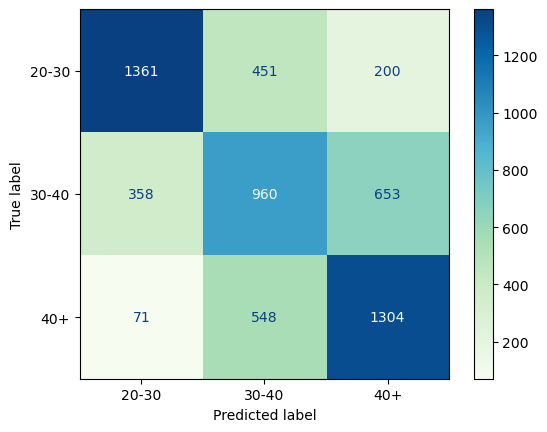

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=clf.classes_)
print(metrics.classification_report(y_test, y_pred))
disp.plot(cmap="GnBu")

              precision    recall  f1-score   support

       20-30       0.76      0.68      0.72      2012
       30-40       0.46      0.49      0.47      1971
         40+       0.60      0.63      0.61      1923

    accuracy                           0.60      5906
   macro avg       0.61      0.60      0.60      5906
weighted avg       0.61      0.60      0.60      5906



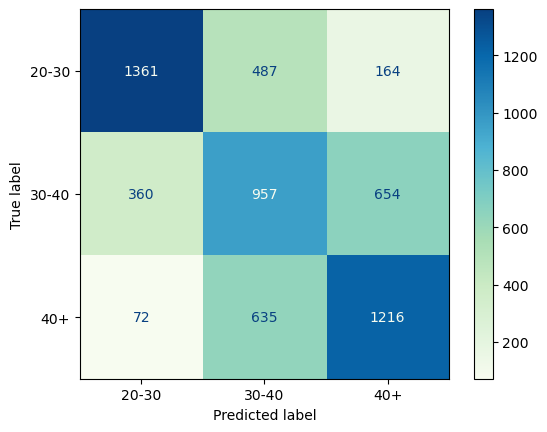

In [32]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=clf.classes_)
print(metrics.classification_report(y_test, y_pred))
disp.plot(cmap="GnBu")

              precision    recall  f1-score   support

       20-30       0.84      0.74      0.78      2012
       30-40       0.61      0.53      0.57      1971
         40+       0.63      0.80      0.71      1923

    accuracy                           0.69      5906
   macro avg       0.69      0.69      0.69      5906
weighted avg       0.70      0.69      0.69      5906



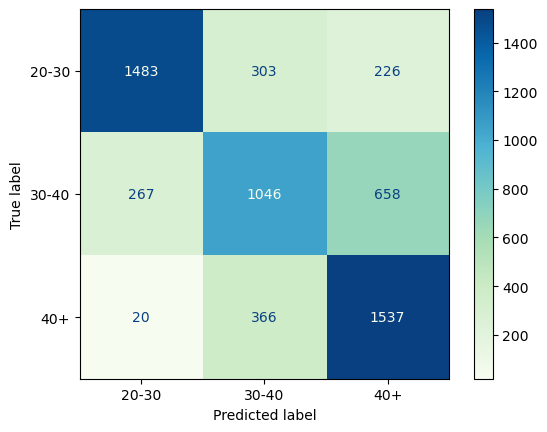

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=clf.classes_)
print(metrics.classification_report(y_test, y_pred))
disp.plot(cmap="GnBu")

In [34]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes', 'LDA', 'Gradient Boosting']
accuracies = [.61,.71,.61,.61, .60, .69]

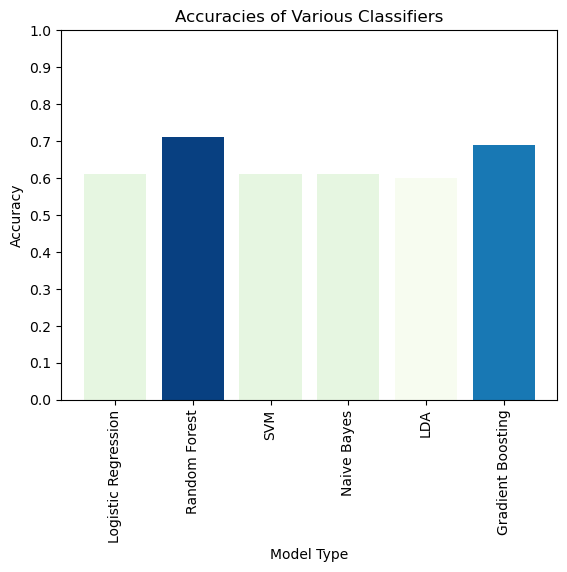

In [44]:
my_cmap = plt.get_cmap('GnBu')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(models, accuracies, color=my_cmap(rescale(accuracies)))
plt.xticks(rotation=90)
plt.ylim((0,1))
plt.yticks(np.arange(0, 1.1, .1))
plt.xlabel("Model Type")
plt.ylabel("Accuracy")
plt.title("Accuracies of Various Classifiers")
plt.show()